# 03. MOC1 in vitro interferon treatment - bulk RNA-seq analysis

MOC1 cells were treated with IFNg or vehicle control for 6 hours, 7 days, or 30 days and harvested for RNA-seq

In [2]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from itertools import combinations
from scipy.stats import mannwhitneyu

## 0. Read in counts and metadata

In [14]:
counts = pd.read_csv('/path/to/chronic_IFN_counts.csv')
counts = counts.rename(columns={'Unnamed: 0': 'Geneid'})

In [15]:
counts = counts.set_index('Geneid')

In [16]:
# remove lowly-expressed genes
counts = counts[counts.sum(axis = 1) > 10]

In [17]:
# remove duplicate genes
counts.index[counts.index.duplicated()]

Index(['Bfar'], dtype='object', name='Geneid')

In [18]:
counts = counts[~counts.index.duplicated()]

In [19]:
# transpose counts for deseq
counts = counts.T

In [20]:
# create a metadata dataframe (from scratch)
metadata = pd.DataFrame(zip(counts.index, ['0h_NT','0h_NT','0h_NT','0h_NT','0h_NT','0h_NT',
                                           '6h_NT','6h_NT','6h_NT','6h_NT','6h_NT','6h_NT',
                                           '6h_IFNg','6h_IFNg','6h_IFNg','6h_IFNg','6h_IFNg','6h_IFNg',
                                           '7d_NT','7d_NT','7d_NT','7d_NT','7d_NT','7d_NT',
                                           '7d_IFNg','7d_IFNg','7d_IFNg','7d_IFNg','7d_IFNg','7d_IFNg',
                                           '1_mo_NT','1_mo_NT','1_mo_NT','1_mo_NT','1_mo_NT','1_mo_NT',
                                           '1_mo_IFNg','1_mo_IFNg','1_mo_IFNg','1_mo_IFNg','1_mo_IFNg','1_mo_IFNg',
                                          ]),
                        columns = ['Sample', 'Condition'])

In [9]:
# now samples are assigned to a condition
metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
RS25,0h_NT
RS26,0h_NT
RS27,0h_NT
RS28,0h_NT
RS29,0h_NT
RS30,0h_NT
RS31,6h_NT
RS32,6h_NT
RS33,6h_NT


## 1. Perform differential expression analysis with pyDESeq2

In [10]:
# initialize
dds = DeseqDataSet(counts=counts,
            metadata=metadata,
            design_factors="Condition")

/usr/local/Caskroom/mambaforge/base/envs/scrna/lib/python3.12/site-packages/pydeseq2/dds.py:264: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(


In [11]:
# run
dds.deseq2()

Fitting size factors...
... done in 0.05 seconds.

Fitting dispersions...
... done in 1.11 seconds.

Fitting dispersion trend curve...
... done in 0.25 seconds.

Fitting MAP dispersions...
... done in 1.45 seconds.

Fitting LFCs...
... done in 0.91 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.



In [12]:
dds

AnnData object with n_obs × n_vars = 42 × 17258
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks'

## 2. Explore pair-wise comparisons

### Part 2a. 6h IFNg changes

In [18]:
h6_stat_res = DeseqStats(dds, contrast = ('Condition','6h-IFNg','6h-NT'))

In [19]:
h6_stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition 6h-IFNg vs 6h-NT
             baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
Geneid                                                                       
Gm6085       2.819036        0.525913  0.584764  0.899360  0.368461  0.703073
Gm6123       0.859342        0.596004  1.051124  0.567016  0.570703       NaN
Mrpl15    1230.975623       -0.098599  0.045794 -2.153107  0.031310  0.179691
Lypla1     583.329309       -0.088066  0.049567 -1.776717  0.075615  0.313653
Tcea1      240.864809       -0.006824  0.073211 -0.093215  0.925733  0.978956
...               ...             ...       ...       ...       ...       ...
Arhgap6     63.202890       -0.383531  0.112242 -3.417002  0.000633  0.007999
Hccs       208.638479       -0.055138  0.063175 -0.872789  0.382778  0.712797
BC022960     3.675854       -0.210235  0.460658 -0.456380  0.648116  0.879301
Mid1         0.559800       -0.417227  1.283819 -0.324989  0.745190       NaN

... done in 0.46 seconds.



In [20]:
h6_res = h6_stat_res.results_df

In [21]:
h6_res = h6_res[h6_res.baseMean >= 10]

In [22]:
h6_sigs = h6_res[(h6_res.padj < 0.05) & (abs(h6_res.log2FoldChange) > 0.5)]


In [23]:
h6_res = h6_res.sort_values(by='stat', ascending=False)

In [24]:
h6_res.head(100)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
Irgm1,1369.489386,4.783024,0.059097,80.935768,0.000000e+00,0.000000e+00
Igtp,2094.671394,7.250422,0.100853,71.891201,0.000000e+00,0.000000e+00
Irf1,1975.737345,3.250533,0.047281,68.749005,0.000000e+00,0.000000e+00
Gbp2,3096.300748,5.865686,0.089394,65.616025,0.000000e+00,0.000000e+00
Tap1,1209.089576,4.384431,0.078406,55.919518,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
Casp12,106.931669,1.894992,0.120308,15.751147,6.744677e-56,9.302033e-54
Rbm43,160.877046,1.222489,0.077781,15.717168,1.153655e-55,1.574680e-53
Rmdn3,294.810728,0.983947,0.062683,15.697188,1.580973e-55,2.135927e-53


In [25]:
h6_res.tail(100)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
Btg2,39.844643,-0.846544,0.178016,-4.755429,1.980250e-06,4.384366e-05
Phlda3,1857.533379,-0.216856,0.045343,-4.782579,1.730606e-06,3.857445e-05
Ube2q2,481.406805,-0.256700,0.053547,-4.793954,1.635260e-06,3.661320e-05
Foxq1,206.060907,-0.462799,0.095816,-4.830092,1.364699e-06,3.109916e-05
Wnt4,1253.638548,-0.214119,0.044104,-4.854891,1.204532e-06,2.763951e-05
...,...,...,...,...,...,...
Ccn2,996.589869,-0.547421,0.061131,-8.954884,3.400924e-19,2.001255e-17
Zfp36l1,470.062406,-0.534701,0.054959,-9.729139,2.265024e-22,1.455773e-20
Cldn2,146.631173,-0.842203,0.085898,-9.804677,1.074908e-22,7.045436e-21


In [51]:
h6_res.to_csv('6h_IFNg_DE_res.csv')

### Part 2b. 7d IFNg changes 

In [52]:
d7_stat_res = DeseqStats(dds, contrast = ('Condition','7d-IFNg','7d-NT'))

In [53]:
d7_stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition 7d-IFNg vs 7d-NT
             baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Geneid                                                                    
Gm6085       2.819036       -1.564303  0.637968 -2.452008  1.420614e-02   
Gm6123       0.859342        1.194734  1.223209  0.976721  3.287073e-01   
Mrpl15    1230.975623       -0.037253  0.047060 -0.791603  4.285920e-01   
Lypla1     583.329309       -0.404874  0.053601 -7.553443  4.239002e-14   
Tcea1      240.864809        0.294894  0.076207  3.869622  1.090042e-04   
...               ...             ...       ...       ...           ...   
Arhgap6     63.202890       -0.491714  0.141932 -3.464426  5.313651e-04   
Hccs       208.638479        0.028869  0.068903  0.418979  6.752316e-01   
BC022960     3.675854       -0.342348  0.533395 -0.641828  5.209851e-01   
Mid1         0.559800       -1.192061  1.729755 -0.689150  4.907290e-01   
Erdr1x      19.609823        0.1467

... done in 0.47 seconds.



In [54]:
d7_res = d7_stat_res.results_df

In [55]:
d7_res = d7_res[d7_res.baseMean >= 10]

In [56]:
d7_sigs = d7_res[(d7_res.padj < 0.05) & (abs(d7_res.log2FoldChange) > 0.5)]


In [57]:
d7_res = d7_res.sort_values(by='stat', ascending=False)

In [58]:
d7_res.head(100)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
B2m,9547.052998,4.128007,0.034192,120.729456,0.000000e+00,0.000000e+00
H2-K1,7194.198061,4.513267,0.040409,111.690792,0.000000e+00,0.000000e+00
H2-D1,2249.975278,3.949735,0.043612,90.565503,0.000000e+00,0.000000e+00
Irgm1,1369.489386,4.492590,0.061957,72.511881,0.000000e+00,0.000000e+00
Igtp,2094.671394,6.660785,0.098510,67.615623,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
Ifit1,139.521977,2.854394,0.123651,23.084318,6.654980e-118,8.939856e-116
Tmigd1,150.327372,2.351951,0.102580,22.928017,2.442076e-116,3.194192e-114
Vwa5a,186.477257,1.823949,0.080137,22.760267,1.135517e-114,1.472321e-112


In [59]:
d7_res.tail(100)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
Slc6a6,1016.786368,-0.613737,0.043724,-14.036586,9.309086e-45,3.568323e-43
Atp13a2,184.124722,-1.401042,0.099635,-14.061792,6.521344e-45,2.525708e-43
Runx3,415.327387,-0.945293,0.067043,-14.099795,3.808761e-45,1.490615e-43
Pbx1,1392.064158,-0.523677,0.037104,-14.113613,3.131180e-45,1.231900e-43
Dsc2,216.011795,-1.250145,0.088196,-14.174699,1.314048e-45,5.211109e-44
...,...,...,...,...,...,...
Nkd2,596.823072,-1.920018,0.061587,-31.175800,2.268064e-213,6.380962e-211
Gprc5b,1005.034881,-1.460568,0.044525,-32.803530,5.243769e-236,1.737552e-233
Id4,602.069431,-2.538929,0.071364,-35.577145,3.161816e-277,1.309607e-274


In [60]:
d7_res.to_csv('7d_IFNg_DE_res.csv')

### Part 2c. 1mo IFNg changes 

In [61]:
m1_stat_res = DeseqStats(dds, contrast = ('Condition','1-mo-IFNg','1-mo-NT'))

In [62]:
m1_stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition 1-mo-IFNg vs 1-mo-NT
             baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Geneid                                                                    
Gm6085       2.819036        1.375906  0.609251  2.258356  2.392345e-02   
Gm6123       0.859342       -0.593158  1.241382 -0.477821  6.327778e-01   
Mrpl15    1230.975623        0.134799  0.045954  2.933354  3.353218e-03   
Lypla1     583.329309       -0.239634  0.048974 -4.893081  9.926938e-07   
Tcea1      240.864809        0.284804  0.071324  3.993077  6.522139e-05   
...               ...             ...       ...       ...           ...   
Arhgap6     63.202890       -0.081391  0.143174 -0.568475  5.697128e-01   
Hccs       208.638479        0.136462  0.067901  2.009713  4.446161e-02   
BC022960     3.675854        0.380433  0.522181  0.728547  4.662789e-01   
Mid1         0.559800       -0.997054  1.088801 -0.915736  3.598056e-01   
Erdr1x      19.609823        0.

... done in 0.47 seconds.



In [63]:
m1_res = m1_stat_res.results_df

In [64]:
m1_res = m1_res[m1_res.baseMean >= 10]

In [65]:
m1_sigs = m1_res[(m1_res.padj < 0.05) & (abs(m1_res.log2FoldChange) > 0.5)]


In [66]:
m1_res = m1_res.sort_values(by='stat', ascending=False)

In [67]:
m1_res.head(100)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
B2m,9547.052998,4.343449,0.034149,127.190565,0.000000e+00,0.000000e+00
H2-K1,7194.198061,4.956821,0.040828,121.407941,0.000000e+00,0.000000e+00
H2-D1,2249.975278,4.255781,0.043857,97.037579,0.000000e+00,0.000000e+00
Il1a,1408.578181,5.487889,0.075684,72.510357,0.000000e+00,0.000000e+00
Irgm1,1369.489386,4.559438,0.063275,72.057309,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
Oasl2,153.825911,3.012197,0.120409,25.016459,4.048007e-138,5.413321e-136
Lgals3bp,94.970406,3.705790,0.149885,24.724245,5.868740e-135,7.779909e-133
Gm4841,225.158258,6.750548,0.273707,24.663375,2.644897e-134,3.446278e-132


In [68]:
m1_res.tail(100)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
Prrx2,375.792358,-1.013685,0.058676,-17.275916,7.143055e-67,3.319996e-65
Etv5,241.027272,-1.302823,0.074675,-17.446471,3.661687e-68,1.728248e-66
Ier5l,570.373369,-0.908756,0.051988,-17.479986,2.035502e-68,9.667051e-67
Tcf7l1,124.985668,-1.742143,0.099582,-17.494490,1.578187e-68,7.518580e-67
Phlda3,1857.533379,-0.798202,0.045250,-17.639736,1.220292e-69,5.831772e-68
...,...,...,...,...,...,...
Gprc5c,301.654068,-3.457782,0.102775,-33.644064,3.807850e-248,1.184708e-245
Nkd2,596.823072,-2.142943,0.062895,-34.071796,1.930652e-254,6.262294e-252
Pdgfa,2782.261591,-1.253923,0.034136,-36.733556,2.128255e-295,8.538221e-293


In [69]:
m1_res.to_csv('1mo_IFNg_DE_res.csv')

isotype vs resistant

### Part 2d. 7d vs 6h IFNg

In [70]:
d7_6h_stat_res = DeseqStats(dds, contrast = ('Condition','7d-IFNg','6h-IFNg'))

In [71]:
d7_6h_stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition 7d-IFNg vs 6h-IFNg
             baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Geneid                                                                    
Gm6085       2.819036       -0.970079  0.664869 -1.459053  1.445504e-01   
Gm6123       0.859342       -0.175792  1.031054 -0.170497  8.646191e-01   
Mrpl15    1230.975623       -0.106138  0.046842 -2.265878  2.345883e-02   
Lypla1     583.329309       -0.433726  0.053348 -8.130162  4.287188e-16   
Tcea1      240.864809        0.088665  0.074482  1.190422  2.338806e-01   
...               ...             ...       ...       ...           ...   
Arhgap6     63.202890       -0.815842  0.137214 -5.945774  2.751540e-09   
Hccs       208.638479       -0.138869  0.067233 -2.065487  3.887690e-02   
BC022960     3.675854       -0.479012  0.523987 -0.914167  3.606292e-01   
Mid1         0.559800       -1.157217  1.729144 -0.669243  5.033405e-01   
Erdr1x      19.609823       -0.05

... done in 0.47 seconds.



In [72]:
d7_6h_res = d7_6h_stat_res.results_df

In [73]:
d7_6h_res = d7_6h_res[d7_6h_res.baseMean >= 10]

In [74]:
d7_6h_sigs = d7_6h_res[(d7_6h_res.padj < 0.05) & (abs(d7_6h_res.log2FoldChange) > 0.5)]


In [75]:
d7_6h_res = d7_6h_res.sort_values(by='stat', ascending=False)

In [76]:
d7_6h_res.head(100)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
H2-K1,7194.198061,3.816221,0.038560,98.968780,0.000000e+00,0.000000e+00
B2m,9547.052998,2.724286,0.032091,84.893660,0.000000e+00,0.000000e+00
H2-D1,2249.975278,2.995044,0.038569,77.653191,0.000000e+00,0.000000e+00
Il1a,1408.578181,3.754653,0.064123,58.553482,0.000000e+00,0.000000e+00
Csf3,1163.004247,3.625433,0.075349,48.115030,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
AA467197,938.223010,2.232260,0.120309,18.554438,7.508915e-77,9.046071e-75
Atf3,151.815062,1.545488,0.083515,18.505444,1.866354e-76,2.229987e-74
Atf5,295.136359,1.441712,0.077998,18.483959,2.780101e-76,3.294759e-74


In [77]:
d7_6h_res.tail(100)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
Id3,1431.351776,-0.857561,0.069224,-12.388153,3.029421e-35,1.206554e-33
Pdgfa,2782.261591,-0.442740,0.035727,-12.392486,2.870055e-35,1.146214e-33
Stat3,586.347337,-0.651144,0.052353,-12.437555,1.634299e-35,6.562858e-34
Sord,69.432604,-1.960686,0.157291,-12.465381,1.153196e-35,4.669484e-34
Eno3,419.589943,-0.804684,0.064544,-12.467167,1.127638e-35,4.578712e-34
...,...,...,...,...,...,...
Rbp1,1350.446240,-1.271100,0.048773,-26.061427,9.984801e-150,4.043012e-147
Id4,602.069431,-1.949089,0.072663,-26.823661,1.711871e-158,8.049657e-156
Ndufa4,7079.542034,-1.204664,0.039795,-30.271972,2.681463e-201,2.057247e-198


In [78]:
d7_6h_res.to_csv('7d_vs_6h_IFNg_DE_res.csv')

### Part 2e. 1mo vs 7d IFNg

In [79]:
m1_d7_stat_res = DeseqStats(dds, contrast = ('Condition','1-mo-IFNg','7d-IFNg'))

In [80]:
m1_d7_stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition 1-mo-IFNg vs 7d-IFNg
             baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Geneid                                                                    
Gm6085       2.819036        1.270372  0.650149  1.953970  5.070477e-02   
Gm6123       0.859342       -1.206415  1.221822 -0.987390  3.234514e-01   
Mrpl15    1230.975623        0.102010  0.046886  2.175714  2.957668e-02   
Lypla1     583.329309        0.372371  0.053651  6.940619  3.903852e-12   
Tcea1      240.864809        0.127987  0.073265  1.746900  8.065476e-02   
...               ...             ...       ...       ...           ...   
Arhgap6     63.202890       -0.089226  0.151544 -0.588781  5.560084e-01   
Hccs       208.638479       -0.117668  0.069515 -1.692695  9.051346e-02   
BC022960     3.675854        0.194763  0.540933  0.360051  7.188093e-01   
Mid1         0.559800        1.583419  1.679324  0.942891  3.457368e-01   
Erdr1x      19.609823        0.

... done in 0.47 seconds.



In [81]:
m1_d7_res = m1_d7_stat_res.results_df

In [82]:
m1_d7_res = m1_d7_res[m1_d7_res.baseMean >= 10]

In [83]:
m1_d7_sig = m1_d7_res[(m1_d7_res.padj < 0.05) & (abs(m1_d7_res.log2FoldChange) > 0.5)]


In [84]:
m1_d7_res = m1_d7_res.sort_values(by='stat', ascending=False)

In [85]:
m1_d7_res.head(100)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
Klk10,187.148919,1.722438,0.070629,24.387090,2.344429e-131,1.669468e-127
Cd74,768.830577,0.952523,0.048349,19.701157,2.107499e-86,6.003001e-83
Cnfn,87.405727,3.070271,0.157065,19.547750,4.311176e-85,1.023329e-81
Hspa1b,867.460348,1.039480,0.055306,18.795167,8.271881e-79,1.682973e-75
Sbsn,426.472331,1.371136,0.076956,17.817165,5.200652e-71,8.229743e-68
...,...,...,...,...,...,...
Ero1a,384.798959,1.195097,0.131659,9.077189,1.114152e-19,7.855325e-18
Ndufv2,1609.136066,0.370752,0.040904,9.063956,1.258031e-19,8.782782e-18
Lce3c,18.390249,2.490199,0.275256,9.046844,1.471598e-19,1.022366e-17


In [86]:
m1_d7_res.tail(100)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
Plin2,885.958420,-0.439443,0.047567,-9.238450,2.500928e-20,1.864828e-18
Angptl4,81.141693,-1.473919,0.159218,-9.257215,2.098332e-20,1.572865e-18
Pir,461.885512,-0.567858,0.060951,-9.316686,1.200306e-20,9.141579e-19
Rpl13a,7707.355985,-0.313680,0.033623,-9.329201,1.066717e-20,8.167840e-19
Ncam1,256.688035,-1.270431,0.136143,-9.331597,1.042880e-20,8.072115e-19
...,...,...,...,...,...,...
Timp1,679.103342,-1.261558,0.075280,-16.758177,4.935272e-63,6.389832e-60
Plac8,1350.377683,-1.058475,0.056609,-18.697942,5.145273e-78,9.159872e-75
Fn1,815.088157,-1.217052,0.061260,-19.866984,7.858472e-88,2.798009e-84


In [87]:
m1_d7_res.to_csv('1mo_vs_7d_IFNg_DE_res.csv')

## 3. Create AnnData object and plot ICB-res and IFN-resp program scores

In [21]:
# Generate an AnnData object from normalized counts matrix and metadata
dds_obs_df = pd.DataFrame(dds.obs)
dds_var_df = pd.DataFrame(dds.var)
dds_matrix_df = pd.DataFrame(dds.layers['normed_counts'], index=dds.obs.index, columns=dds.var.index)

norm_counts = pd.concat([dds_obs_df, dds_matrix_df], axis=1)
adata = sc.AnnData(norm_counts.iloc[:, 2:])
adata.obs = metadata

In [23]:
# define gene signatures
elf_sig = [
    "Prss27", "Elf3", "Desi1", "Ltf", "Pglyrp4", "Pdzk1ip1", "Spns2", "Psca", "Prss22", "Tmprss11g",
    "Gsto1", "Krt19", "Muc20", "Tspan1", "Duoxa2", "Gm13056", "Tmc5", "Ecm1", "Cblc", "Gm9573", 
    "AA467197", "Capn5", "Glrx", "Spns3", "Tmprss11e", "Gm14137", "Trp53inp2", "Slc6a14", "Dynap", 
    "Dusp4", "Cldn23", "AI661453", "Clic5", "Grpel2", "Apol7a", "Gde1", "Mal", "Duox2", "Nupr1", 
    "Cldn1", "P2ry2", "Irf7", "S100a14", "Cdkn2b", "Mall", "Plekhs1", "AC168977.1", "Muc4", "Fxyd4", 
    "Ly6m", "Trim15", "Mal2", "Wnt7b", "Ift22", "Plet1", "Ppbp", "Hist1h1c", "Cryba4", "Krt7", "Hsd17b7", 
    "Clca3b", "Tmprss11f", "Serpinb9f", "Gm48975", "Myzap", "Slc9a3r1", "Pttg1ip", "Slc28a3", "Cidea", 
    "Gm13074", "Gm20234", "Arg1", "4930459C07Rik", "Bspry", "Ccdc12", "Pigr", "Krt23", "1810044K17Rik", 
    "Cyp2d10", "Pbp2", "Cxcl5", "Tmprss4", "Lpcat4", "Ccdc71l", "Arhgap27os1", "Eps8l2", "Tmprss11b", 
    "Serpinb9g", "Csf3", "Ifit1bl1", "Liph", "Ephb3", "AA986860", "Lgals3", "Rassf7", "Gm49439", "Grhl1", 
    "Gfpt1", "Trim16", "Sprr2d"
]

ifn_resp=['Irf1', 'Tap1', 'Stat1', 'Cxcl10', 'Stat3', 'Irf8', 'Cx3cl1', 'Psmb10', 'B2m', 'Psmb9', 
          'Ifit1', 'Ifit2', 'Ifit3', 'Psmb8', 'Tap2', 'Irf9', 'Cxcl9', 'Ifit3', 'Ifit3', 'H2-D1', 
          'H2-K1', 'H2-Q4', 'H2-M3', 'H2-T22', 'Irf7', 'Irf1']

In [24]:
# score gene signatures
sc.tl.score_genes(adata, ifn_resp, score_name='ifn_resp')
sc.tl.score_genes(adata, elf_sig, score_name='elf_sig')

       'Slc9a3r1', 'Gm13074', 'Gm20234', '4930459C07Rik', '1810044K17Rik',
       'Serpinb9g', 'Gm49439'],
      dtype='object')


In [26]:
# split anndata object into acute and chronic timepoints for separate plotting
adata_chronic = adata[adata.obs.Condition.isin(['7d_NT','7d_IFNg','1_mo_NT','1_mo_IFNg'])]
adata_acute = adata[adata.obs.Condition.isin(['6h_NT','6h_IFNg'])]

In [105]:
# Create function to make boxplots of scores with overlayed scatterplots
def box_scatter(
    adata,
    metric: str = "elf_sig",
    groupby: str = "Condition",
    dot_size: int = 60,
    palette=None,
    alpha: float = 0.75,
    jitter: float = 0.25,
    figsize=(2.5, 4),
    show=True,
    ref_group: str = "6h_NT",
    mode: str = "delta",
    ylim: tuple | list | None = None,
    box_width: float = 0.4,
    save_path: str | None = None,
):
    """
    Box-and-scatter plot normalized to `ref_group`, with box edge colors matching palette.
    """
    df = adata.obs[[groupby, metric]].dropna().copy()

    # Normalize
    ref_mean = df.loc[df[groupby] == ref_group, metric].mean()
    if mode == "delta":
        df["norm"] = df[metric] - ref_mean
        ylabel = f"{metric} – mean({ref_group})"
    elif mode == "ratio":
        df["norm"] = df[metric] / ref_mean
        ylabel = f"{metric} / mean({ref_group})"
    else:
        raise ValueError("mode must be 'delta' or 'ratio'")

    # plot
    plt.figure(figsize=figsize)

    ax = sns.boxplot(
        x=groupby, y="norm", data=df,
        palette=palette, width=box_width,
        showfliers=False,
        linewidth=0.8,
        medianprops=dict(color="black", linewidth=1.3),
    )

    sns.stripplot(
        x=groupby, y="norm", data=df,
        color="black",
        size=dot_size, jitter=jitter,
        alpha=alpha, edgecolor="black", linewidth=0.3,
    )

    # match box edge colors to palette
    if palette is not None:
        # get box elements in the same order as group levels
        levels = df[groupby].unique()
        for patch, level in zip(ax.artists, levels):
            patch.set_edgecolor(palette[level])
            patch.set_linewidth(1.0)

    sns.despine()
    if ylim is not None:
        plt.ylim(ylim)

    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()

    if save_path is not None:
        plt.savefig(save_path, dpi=300)

    if show:
        plt.show()
    else:
        return ax


### 3a. Acute timepoint

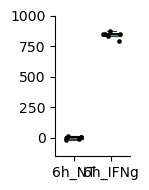

In [34]:
# custom colors & bigger dots
my_palette = {
    "6h_NT":      "dimgrey",
    "6h_IFNg":      "limegreen"
}

# draw the figure
box_scatter(
    adata_acute,           
    metric   = "ifn_resp", 
    groupby  = "Condition",
    palette  = my_palette, 
    dot_size = 3,         
    figsize=(1.5, 2),
    alpha    = 1,          
    ylim     = (-150, 1000), 
    box_width=0.5,   
    #save_path="ifn_resp_boxplot.png"
)

In [35]:
# extract Condition + ifn_resp from adata_acute
df_acute = adata_acute.obs[["Condition", "ifn_resp"]].dropna()

# run MWU test between all pairs
results = []
groups = df_acute["Condition"].unique()

for g1, g2 in combinations(groups, 2):
    data1 = df_acute[df_acute["Condition"] == g1]["ifn_resp"]
    data2 = df_acute[df_acute["Condition"] == g2]["ifn_resp"]
    stat, pval = mannwhitneyu(data1, data2, alternative="two-sided")
    results.append({
        "Group 1": g1,
        "Group 2": g2,
        "MWU stat": stat,
        "p-value": pval
    })

# convert to DataFrame
results_df = pd.DataFrame(results).sort_values("p-value")
print(results_df)

  Group 1  Group 2  MWU stat   p-value
0   6h_NT  6h_IFNg       0.0  0.002165


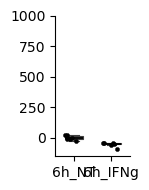

In [36]:
# custom colors & bigger dots
my_palette = {
    "6h_NT":      "dimgrey",
    "6h_IFNg":      "red"
}

# draw the figure
box_scatter(
    adata_acute,           
    metric   = "elf_sig", 
    groupby  = "Condition",
    palette  = my_palette, 
    dot_size = 3,          
    figsize=(1.5, 2),
    alpha    = 1,          
    ylim     = (-150, 1000), 
    box_width=0.5,   
    #save_path="ifn_resp_boxplot.png"
)

In [40]:
# extract the needed columns from AnnData
df = adata_chronic.obs[["Condition", "elf_sig"]].dropna()

results = []

# get pairwise group comparisons
groups = df["Condition"].unique()
for g1, g2 in combinations(groups, 2):
    data1 = df[df["Condition"] == g1]["elf_sig"]
    data2 = df[df["Condition"] == g2]["elf_sig"]
    stat, pval = mannwhitneyu(data1, data2, alternative="two-sided")
    results.append({
        "Group 1": g1,
        "Group 2": g2,
        "MWU stat": stat,
        "p-value": pval
    })

# convert to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values("p-value", inplace=True)
print(results_df)

   Group 1    Group 2  MWU stat   p-value
0    7d_NT    7d_IFNg       0.0  0.002165
2    7d_NT  1_mo_IFNg       0.0  0.002165
3  7d_IFNg    1_mo_NT      36.0  0.002165
4  7d_IFNg  1_mo_IFNg       0.0  0.002165
5  1_mo_NT  1_mo_IFNg       0.0  0.002165
1    7d_NT    1_mo_NT      28.0  0.132035


### 3b. Chronic timepoint

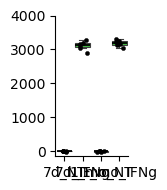

In [41]:
# custom colors & bigger dots
my_palette = {
    "7d_NT":      "dimgrey",
    "7d_IFNg":      "limegreen",
    "1_mo_NT":      "dimgrey",
    "1_mo_IFNg":      "limegreen",
    
}
# draw the figure
box_scatter(
    adata_chronic,          
    metric   = "ifn_resp",
    groupby  = "Condition",
    figsize=(1.7, 2),
    palette  = my_palette, 
    ref_group="7d_NT",
    dot_size = 3,          
    alpha    = 1,          
    ylim     = (-150, 4000), 
    box_width=.8,   
    #save_path="ifn_resp_chronic_boxplot.png"
)

In [42]:
import pandas as pd
from itertools import combinations
from scipy.stats import mannwhitneyu

# extract the needed columns from AnnData
df = adata_chronic.obs[["Condition", "ifn_resp"]].dropna()

results = []

# get pairwise group comparisons
groups = df["Condition"].unique()
for g1, g2 in combinations(groups, 2):
    data1 = df[df["Condition"] == g1]["ifn_resp"]
    data2 = df[df["Condition"] == g2]["ifn_resp"]
    stat, pval = mannwhitneyu(data1, data2, alternative="two-sided")
    results.append({
        "Group 1": g1,
        "Group 2": g2,
        "MWU stat": stat,
        "p-value": pval
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values("p-value", inplace=True)

results_df

,Group 1,Group 2,MWU stat,p-value
0,7d_NT,7d_IFNg,0.0,0.002165
2,7d_NT,1_mo_IFNg,0.0,0.002165
3,7d_IFNg,1_mo_NT,36.0,0.002165
5,1_mo_NT,1_mo_IFNg,0.0,0.002165
1,7d_NT,1_mo_NT,28.0,0.132035
4,7d_IFNg,1_mo_IFNg,12.0,0.393939


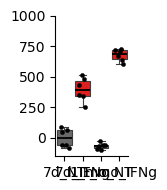

In [43]:
my_palette = {
    "7d_NT": "dimgrey",
    "7d_IFNg": "red",
    "1_mo_NT": "dimgrey",
    "1_mo_IFNg": "red"
}

box_scatter(
    adata_chronic,
    metric="elf_sig",
    groupby="Condition",
    palette=my_palette,
    ref_group="7d_NT",        
    dot_size=3,
    alpha=1,
    figsize=(1.7, 2),
    ylim=(-150, 1000),
    box_width=.8,
    #save_path="icb_res_chronic_boxplot.png"
)

In [44]:
# Extract the needed columns from AnnData
df = adata_chronic.obs[["Condition", "elf_sig"]].dropna()

# Store results
results = []

# Get all pairwise group comparisons
groups = df["Condition"].unique()
for g1, g2 in combinations(groups, 2):
    data1 = df[df["Condition"] == g1]["elf_sig"]
    data2 = df[df["Condition"] == g2]["elf_sig"]
    stat, pval = mannwhitneyu(data1, data2, alternative="two-sided")
    results.append({
        "Group 1": g1,
        "Group 2": g2,
        "MWU stat": stat,
        "p-value": pval
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values("p-value", inplace=True)
results_df

,Group 1,Group 2,MWU stat,p-value
0,7d_NT,7d_IFNg,0.0,0.002165
2,7d_NT,1_mo_IFNg,0.0,0.002165
3,7d_IFNg,1_mo_NT,36.0,0.002165
4,7d_IFNg,1_mo_IFNg,0.0,0.002165
5,1_mo_NT,1_mo_IFNg,0.0,0.002165
1,7d_NT,1_mo_NT,28.0,0.132035


## 4. Integrate IFN re-stimulation data

### 4a. Read in and format counts matrices and metadata

In [18]:
# set 1 (re-stimulation)
counts_1 = pd.read_csv('/path/to/MOC1_cIFNG_Elf3_counts.csv')
counts_1 = counts_1.rename(columns={'Unnamed: 0': 'Geneid'})
counts_1 = counts_1.set_index('Geneid')
counts_1 = counts_1[counts_1.sum(axis = 1) > 10]
counts_1 = counts_1[~counts_1.index.duplicated()]
counts_1 = counts_1.T

In [19]:
# set 2 (acute and chronic timepoints)
counts_2 = pd.read_csv('/path/to/chronic_IFN_counts.csv')
counts_2 = counts_2.rename(columns={'Unnamed: 0': 'Geneid'})
counts_2 = counts_2.set_index('Geneid')
counts_2 = counts_2[counts_2.sum(axis = 1) > 10]
counts_2 = counts_2[~counts_2.index.duplicated()]
counts_2 = counts_2.T

In [35]:
metadata_1 = pd.read_csv('/path/to/EG15RS_Counts_Files/counts_manifest.csv')
metadata_1 = metadata_1.set_index('sample')
metadata_1 = metadata_1[metadata_1.experiment == 'MOC1_cIFNG_Elf3']
metadata_1 = metadata_1.drop(columns=['experiment'])

In [37]:
metadata_2 = pd.DataFrame(zip(counts_2.index, ['0h_NT','0h_NT','0h_NT','0h_NT','0h_NT','0h_NT',
                                           '6h_NT','6h_NT','6h_NT','6h_NT','6h_NT','6h_NT',
                                           '6h_IFNg','6h_IFNg','6h_IFNg','6h_IFNg','6h_IFNg','6h_IFNg',
                                           '7d_NT','7d_NT','7d_NT','7d_NT','7d_NT','7d_NT',
                                           '7d_IFNg','7d_IFNg','7d_IFNg','7d_IFNg','7d_IFNg','7d_IFNg',
                                           '1_mo_NT','1_mo_NT','1_mo_NT','1_mo_NT','1_mo_NT','1_mo_NT',
                                           '1_mo_IFNg','1_mo_IFNg','1_mo_IFNg','1_mo_IFNg','1_mo_IFNg','1_mo_IFNg',
                                          ]),
                        columns = ['sample', 'condition'])
metadata_2 = metadata_2.set_index('sample')


In [38]:
metadata = pd.concat([metadata_1, metadata_2], ignore_index=False)

In [39]:
counts = pd.concat([counts_1, counts_2], ignore_index=False)
counts = counts.dropna(axis=1)

### 4b. Integrate datasets using pyDESeq2 size-factor normalization

In [41]:
# initialize
dds = DeseqDataSet(counts=counts,
            metadata=metadata,
            design_factors="condition")

/usr/local/Caskroom/mambaforge/base/envs/scrna/lib/python3.12/site-packages/pydeseq2/dds.py:264: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(


In [42]:
# run DESeq2
dds.deseq2()

Fitting size factors...
... done in 0.06 seconds.

Fitting dispersions...
... done in 1.14 seconds.

Fitting dispersion trend curve...
... done in 0.21 seconds.

Fitting MAP dispersions...
... done in 1.47 seconds.

Fitting LFCs...
... done in 1.07 seconds.

Calculating cook's distance...
... done in 0.04 seconds.

Replacing 0 outlier genes.



In [43]:
dds

AnnData object with n_obs × n_vars = 74 × 14896
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks'

In [44]:
# create normalized counts matrix
dds_obs_df = pd.DataFrame(dds.obs)
dds_var_df = pd.DataFrame(dds.var)
dds_matrix_df = pd.DataFrame(dds.layers['normed_counts'], index=dds.obs.index, columns=dds.var.index)

norm_counts = pd.concat([dds_obs_df, dds_matrix_df], axis=1)

In [45]:
# create adata object
adata = sc.AnnData(norm_counts.iloc[:, 1:])
adata.obs = metadata

### 4c. Score for gene sets

In [46]:
# define gene lists
ICBres = [
    "Prss27", "Desi1", "Ltf", "Pglyrp4", "Pdzk1ip1", "Spns2", "Psca", "Prss22", "Tmprss11g",
    "Gsto1", "Krt19", "Muc20", "Tspan1", "Duoxa2", "Gm13056", "Tmc5", "Ecm1", "Cblc", "Gm9573", 
    "AA467197", "Capn5", "Glrx", "Spns3", "Tmprss11e", "Gm14137", "Trp53inp2", "Slc6a14", "Dynap", 
    "Dusp4", "Cldn23", "AI661453", "Clic5", "Grpel2", "Apol7a", "Gde1", "Mal", "Duox2", "Nupr1", 
    "Cldn1", "P2ry2", "Irf7", "S100a14", "Cdkn2b", "Mall", "Plekhs1", "AC168977.1", "Muc4", "Fxyd4", 
    "Ly6m", "Trim15", "Mal2", "Wnt7b", "Ift22", "Plet1", "Ppbp", "Hist1h1c", "Cryba4", "Krt7", "Hsd17b7", 
    "Clca3b", "Tmprss11f", "Serpinb9f", "Gm48975", "Myzap", "Slc9a3r1", "Pttg1ip", "Slc28a3", "Cidea", 
    "Gm13074", "Gm20234", "Arg1", "4930459C07Rik", "Bspry", "Ccdc12", "Pigr", "Krt23", "1810044K17Rik", 
    "Cyp2d10", "Pbp2", "Cxcl5", "Tmprss4", "Lpcat4", "Ccdc71l", "Arhgap27os1", "Eps8l2", "Tmprss11b", 
    "Serpinb9g", "Csf3", "Ifit1bl1", "Liph", "Ephb3", "AA986860", "Lgals3", "Rassf7", "Gm49439", "Grhl1", 
    "Gfpt1", "Trim16", "Sprr2d"
]

IFNresp = [
    "Gbp6", "Gbp2", "Iigp1", "Cntn1", "Gm4951", "Olfr56", "Mill1", "Cxcl10", 
    "Gbp4", "Ifit3", "Apol10b", "Ifi47", "Gbp5", "Slco2a1", "Prl2c2", "Greb1l", 
    "Gbp8", "Ccl7", "Gm14636", "Gm12185", "Apol9a", "Gm15987", "Adgrb3", 
    "Prl2c3", "Ccl2", "Rgs4", "Ifit1", "Serpina3g", "Irf1", "Asic2", "Cxcl9", 
    "Ms4a4d", "Ifih1", "Gm16685", "Alox12e", "Nrg1", "Ghr", "Gm26907", "Clic4", 
    "Robo2", "F830016B08Rik", "Lama3", "Fam126a", "Gm4841", "Gnb4", "Ammecr1", 
    "C130026I21Rik", "Prl2c5", "Samd5", "Fcgbp", "Plcb1", "Flnb", "Cyp7b1", 
    "Il24", "Alox15", "Ifit3b", "Ncam1", "Csprs", "Cd44", "Il18r1", "Serpinb2", 
    "Efemp1", "Tenm1", "Ccl8", "Slc6a4", "Has2", "Ubd", "Nppb", "Ccl11", "Fap", 
    "Pcdh7", "Gm17268", "Ifi203", "Tnc", "Majin", "Csmd1", "Robo1", "Vcam1", 
    "Irf7", "BC028777", "Npas3", "Itgb6", "Dclk1", "Nek10", "Ly75", "Cfap47", 
    "Slc4a7", "Vegfc", "Cnga1", "Hcn1", "Syt1", "Slco1a5", "Gdnf", "Tenm3", 
    "Erc1", "Skint3", "Pdlim1", "Dnah8", "1700120C14Rik", "Tnip3"
]

In [47]:
sc.tl.score_genes(adata, ICBres, score_name='ICBres')

       'Gm48975', 'Slc9a3r1', 'Slc28a3', 'Gm13074', 'Gm20234', '4930459C07Rik',
       '1810044K17Rik', 'Cyp2d10', 'Pbp2', 'Serpinb9g', 'Gm49439'],
      dtype='object')


In [48]:
sc.tl.score_genes(adata, IFNresp, score_name='IFNresp')

       'Gm26907', 'Fam126a', 'C130026I21Rik', 'Csprs', 'Ccl8', 'Ccl11', 'Fap',
       'Gm17268', 'Majin', 'Csmd1', 'BC028777', 'Npas3', 'Nek10', 'Cfap47',
       'Cnga1', 'Syt1', 'Dnah8'],
      dtype='object')


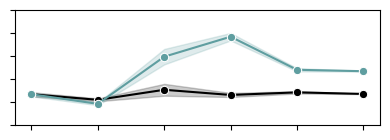

In [49]:
# define the program to plot
prog = "ICBres"

# define grouping and plotting parameters
group_order = ['0h', '6h', '7d', '1_mo', 'Washout', 'Re-stim']
controls = ['0h_NT', '6h_NT', '7d_NT', '1_mo_NT', 'WT_veh', 'WT_veh_restim']
ifn = ['6h_IFNg', '7d_IFNg', '1_mo_IFNg', 'WT_IFNg', 'WT_IFNg_restim']
custom_palette = {"Control": "black", "IFNg": "cadetblue"}  # blue and red

plot_data = adata.obs[[prog, 'condition']].copy()
plot_data = plot_data[plot_data['condition'].isin(controls + ifn)]

# add 0h_IFNg by copying 0h_NT
zero_hour_copy = plot_data[plot_data['condition'] == '0h_NT'].copy()
zero_hour_copy['condition'] = '0h_IFNg'
plot_data = pd.concat([plot_data, zero_hour_copy], axis=0)

# define time group from condition
def get_group(cond):
    if 'WT_veh_restim' in cond or 'WT_IFNg_restim' in cond:
        return 'Re-stim'
    elif 'WT_veh' in cond or 'WT_IFNg' in cond:
        return 'Washout'
    elif '0h' in cond:
        return '0h'
    elif '6h' in cond:
        return '6h'
    elif '7d' in cond:
        return '7d'
    elif '1_mo' in cond:
        return '1_mo'
    else:
        return 'Other'

# apply metadata
plot_data['Group'] = plot_data['condition'].apply(get_group)
plot_data['Treatment'] = plot_data['condition'].apply(lambda x: 'IFNg' if 'IFNg' in x else 'Control')
plot_data['Group'] = pd.Categorical(plot_data['Group'], categories=group_order, ordered=True)

# plot
plt.figure(figsize=(4, 1.5))
sns.lineplot(
    data=plot_data,
    x='Group',
    y=prog,
    hue='Treatment',
    estimator='mean',
    errorbar='sd',
    marker='o',
    palette=custom_palette
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend().remove()
plt.xticks(ticks=range(len(group_order)), labels=[''] * len(group_order))  # keep ticks, remove labels
plt.yticks(ticks=plt.yticks()[0], labels=[''] * len(plt.yticks()[0]))
plt.tight_layout()
#plt.savefig('ICB_res_timeline.png', dpi=600)
plt.show()


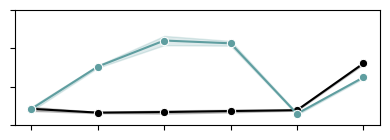

In [55]:
# define the program to plot
prog = "IFNresp"

# define grouping and plotting parameters
group_order = ['0h', '6h', '7d', '1_mo', 'Washout', 'Re-stim']
controls = ['0h_NT', '6h_NT', '7d_NT', '1_mo_NT', 'WT_veh', 'WT_veh_restim']
ifn = ['6h_IFNg', '7d_IFNg', '1_mo_IFNg', 'WT_IFNg', 'WT_IFNg_restim']
custom_palette = {"Control": "black", "IFNg": "cadetblue"}  # blue and red

plot_data = adata.obs[[prog, 'condition']].copy()
plot_data = plot_data[plot_data['condition'].isin(controls + ifn)]

# add 0h_IFNg by copying 0h_NT
zero_hour_copy = plot_data[plot_data['condition'] == '0h_NT'].copy()
zero_hour_copy['condition'] = '0h_IFNg'
plot_data = pd.concat([plot_data, zero_hour_copy], axis=0)

# define time group from condition
def get_group(cond):
    if 'WT_veh_restim' in cond or 'WT_IFNg_restim' in cond:
        return 'Re-stim'
    elif 'WT_veh' in cond or 'WT_IFNg' in cond:
        return 'Washout'
    elif '0h' in cond:
        return '0h'
    elif '6h' in cond:
        return '6h'
    elif '7d' in cond:
        return '7d'
    elif '1_mo' in cond:
        return '1_mo'
    else:
        return 'Other'

# apply metadata
plot_data['Group'] = plot_data['condition'].apply(get_group)
plot_data['Treatment'] = plot_data['condition'].apply(lambda x: 'IFNg' if 'IFNg' in x else 'Control')
plot_data['Group'] = pd.Categorical(plot_data['Group'], categories=group_order, ordered=True)

# plot
plt.figure(figsize=(4, 1.5))
sns.lineplot(
    data=plot_data,
    x='Group',
    y=prog,
    hue='Treatment',
    estimator='mean',
    errorbar='sd',
    marker='o',
    palette=custom_palette
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend().remove()
plt.xticks(ticks=range(len(group_order)), labels=[''] * len(group_order))  # keep ticks, remove labels
plt.yticks(ticks=plt.yticks()[0], labels=[''] * len(plt.yticks()[0]))
plt.tight_layout()
#plt.savefig('ICB_res_timeline.png', dpi=600)
plt.show()


## 5. Plot MOC1(IFN) sustained gene expression (for comparison to MOC1res)

In [109]:
adata_plot = adata.copy()
adata_plot = adata_plot[adata_plot.obs['condition'].isin(['WT_veh','WT_IFNg'])]

/usr/local/Caskroom/mambaforge/base/envs/scrna/lib/python3.12/site-packages/anndata/_core/anndata.py:1145: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


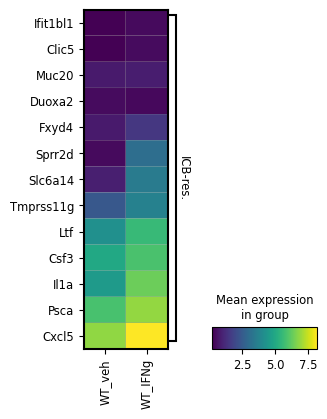

In [111]:
markers = {'ICB-res.': ['Ifit1bl1','Clic5','Muc20','Duoxa2','Fxyd4','Sprr2d','Slc6a14','Tmprss11g',
                         'Ltf','Csf3','Il1a','Psca','Cxcl5'
                ]}
sc.pl.matrixplot(adata_plot, markers, groupby='condition', categories_order = ['WT_veh','WT_IFNg'],
                 dendrogram=False, use_raw=False, figsize = (3,4),
                 swap_axes=True, log=True, #save='cIFNg_genes.png'
                )